<center><h1>El modelo de regresión lineal</h1></center>

## 1. Aprendizaje basado en instancias vs. Aprendizaje basado en modelos.

Recorrimos el flujo de trabajo completo del aprendizaje automático mediante el algoritmo de k-vecinos más cercanos. K-vecinos más cercanos funciona al encontrar ejemplos etiquetados similares del conjunto de entrenamiento para cada instancia en el conjunto de prueba y los usa para predecir la etiqueta. K-vecinos más cercanos se conoce como un algoritmo de aprendizaje **basado en instancias** porque se basa completamente en instancias anteriores para hacer predicciones. El algoritmo de k vecinos más cercanos no intenta comprender ni capturar la relación entre las columnas de características y la columna objetivo.

Debido a que todo el conjunto de datos de entrenamiento se usa para encontrar los vecinos más cercanos de una nueva instancia para hacer predicciones de etiquetas, este algoritmo no se adapta bien a conjuntos de datos medianos y grandes. Si tenemos un millón de instancias en nuestro conjunto de datos de entrenamiento y queremos hacer predicciones para cien mil instancias nuevas, tendríamos que ordenar el millón de instancias en el conjunto de entrenamiento por distancia euclidiana para cada instancia. El siguiente diagrama proporciona una descripción general de la complejidad de los k-vecinos más cercanos:

<img src="figs/knn_complexity.svg" widht="800" height="600"/>

En su lugar, debemos aprender sobre enfoques de **aprendizaje automático paramétrico**, como la regresión lineal y la regresión logística. A diferencia del algoritmo de k vecinos más cercanos, el resultado del proceso de entrenamiento para estos algoritmos de aprendizaje automático es una función matemática que se aproxima mejor a los patrones en el conjunto de entrenamiento. En el aprendizaje automático, esta función a menudo se denomina **modelo**.

En este curso, exploraremos el modelo de aprendizaje automático más utilizado: **el modelo de regresión lineal**. Los enfoques de aprendizaje automático paramétrico funcionan haciendo suposiciones sobre la relación entre las características y la columna de destino. En la regresión lineal, la relación aproximada entre las columnas de características y la columna objetivo se expresa como una ecuación de regresión lineal:

$y = a_1x_1 + a_2x_2 + \cdots+ a_nx_n  $

El siguiente diagrama proporciona una descripción general del proceso de aprendizaje automático para la regresión lineal. Por ahora, el objetivo no es comprender todo el proceso, sino más bien comparar y contrastar con el **enfoque no paramétrico** de k-vecinos más cercanos.

<img src="figs/regression_complexity.png" widht="800" height="600"/>

A continuación proporcionaremos una descripción general de cómo usamos un modelo de regresión lineal para hacer predicciones. Usaremos scikit-learn para el proceso de entrenamiento del modelo, de modo que podamos centrarnos en ganar intuición para el enfoque de aprendizaje basado en modelos para el aprendizaje automático. Posteriormente, nos sumergiremos en las matemáticas detrás de cómo se ajusta un modelo al conjunto de datos, cómo seleccionar y transformar características, y más.


## 2. Introducción a los datos

Para familiarizarse con este enfoque de aprendizaje automático, trabajaremos con un conjunto de datos sobre casas vendidas en Ames, Iowa. Cada fila en el conjunto de datos describe las propiedades de una sola casa, así como la cantidad por la que se vendió. Construiremos modelos que predicen el precio de venta final a partir de sus otros atributos. Específicamente, exploraremos las siguientes preguntas:

- ¿Qué propiedades de una casa afectan más el precio final de venta?
- ¿Con qué eficacia podemos predecir el precio de venta solo a partir de sus propiedades?

Este conjunto de datos fue compilado originalmente por [Dean De Cock](https://www.truman.edu/faculty-staff/decock/) con el objetivo principal de tener un conjunto de datos de alta calidad para la regresión. Puede leer más sobre su proceso y motivación [aquí](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627).

Estas son algunas de las columnas:

- `Lot Area`: Tamaño del lote en pies cuadrados.
- `Overall Qual`: Califica el material general y el acabado de la casa.
- `Overall Cond`: Califica el estado general de la casa.
- `Year Built`: Fecha de construcción original.
- `Low Qual Fin SF`: Pies cuadrados terminados de baja calidad (todos los pisos).
- `Full Bath`: Baños completos sobre rasante.
- `Fireplaces`: Número de chimeneas.


Comencemos por generar conjuntos de datos de entrenamiento y prueba y familiarizarnos más con los datos.


### Ejercicio
- Lea `AmesHousing.txt` en un dataframe usando el delimitador de tabulación (`\t`) y asígnelo `data`.
- Seleccione las primeras 1460 filas de `data` y asígnelas a `train`.
- Seleccione las filas restantes de `data` y asígnelas a `test`.
- Utilice el método `dataframe.info()` para mostrar información sobre cada columna.
- Lea la documentación de datos para familiarizarse más con cada columna.
- Usando la documentación de `datos`, determine qué columna es la columna objetivo que queremos predecir. Asigne el nombre de la columna como una cadena a `target`.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('AmesHousing.txt', delimiter='\t')


In [5]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
print(data.shape[0] / 2)
train = data[:1465].copy()
test = data[1465:].copy()

print(train.shape)
print(test.shape)

1465.0
(1465, 82)
(1465, 82)


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [11]:
target = 'SalePrice'

## 3. Regresión lineal simple.

Comenzaremos por comprender el caso univariante de la regresión lineal, también conocida como **regresión lineal simple**. La siguiente ecuación es la forma general del modelo de regresión lineal simple.

$\hat{y} = a_1x_1 + a_0$

$\hat{y}$ representa la columna objetivo mientras que $x_1$ representa la columna de características que elegimos usar en nuestro modelo. Estos valores son independientes del conjunto de datos. Por otro lado, $a_0$  y $a_1$ representan los valores de los **parámetros** que son específicos del conjunto de datos. El objetivo de la regresión lineal simple es encontrar los valores de parámetros óptimos que mejor describan la relación entre la columna de características y la columna obtivo (target). El siguiente diagrama muestra diferentes modelos de regresión lineal simple dependiendo de los datos:

<img src="figs/simple_linear_regression.svg" widht="800" height="600"/>


El primer paso es seleccionar la característica, $x_1$, queremos usar en nuestro modelo. Una vez que seleccionamos esta característica (variable), podemos usar scikit-learn para determinar los valores óptimos de los parámetros $a_1$ y $a_0$ en base a los datos de entrenamiento. Debido a que una de las suposiciones de la regresión lineal es que la relación entre las funciones y la columna de destino es lineal, queremos elegir una función que parezca tener la correlación más fuerte con el precio de venta final.


### Ejercicio

Para explorar los datos, cree un gráfico utilizando el dataframe de `train`.

- Cree una figura con dimensiones de 7 x 15 que contenga tres diagramas de dispersión en una sola columna:
- El primer gráfico debe trazar la columna `Garage Area` en el eje x contra la columna `SalePrice` en el eje y.
- El segundo debe trazar la columna `Gr Liv Area` en el eje x contra la columna `SalePrice` en el eje y.
- El tercero debe trazar la columna `Overall Cond` en el eje x contra la columna `SalePrice` en el eje y.
- Lea más sobre estas 3 columnas en la documentación de datos.

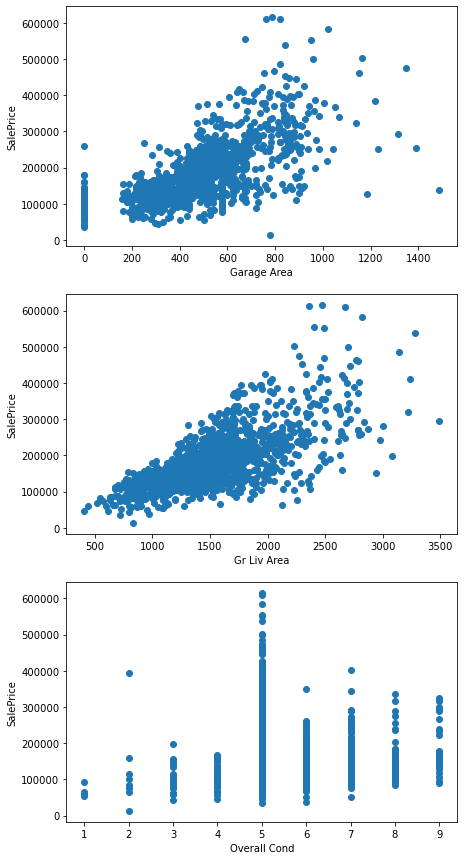

In [27]:
plt.figure(figsize=(7,15))
plt.subplot(311)
plt.scatter(train['Garage Area'], train['SalePrice'])
plt.xlabel('Garage Area')
plt.ylabel('SalePrice')
plt.subplot(312)
plt.scatter(train['Gr Liv Area'], train['SalePrice'])
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.subplot(313)
plt.scatter(train['Overall Cond'], train['SalePrice'])
plt.xlabel('Overall Cond')
plt.ylabel('SalePrice')
plt.show()

## 4. Mínimos cuadrados.
Podemos decir que la función `Gr Liv Area` se correlaciona más con la columna `SalePrice`. Podemos confirmar esto calculando la correlación entre pares de estas columnas usando el método [`pandas.DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html):


In [31]:
print(train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr(), '\n')
print(train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()[-1:])

              Garage Area  Gr Liv Area  Overall Cond  SalePrice
Garage Area      1.000000     0.467083     -0.133738   0.663488
Gr Liv Area      0.467083     1.000000     -0.135278   0.699537
Overall Cond    -0.133738    -0.135278      1.000000  -0.100926
SalePrice        0.663488     0.699537     -0.100926   1.000000 

           Garage Area  Gr Liv Area  Overall Cond  SalePrice
SalePrice     0.663488     0.699537     -0.100926        1.0


La correlación entre `Gr Liv Area` y SalePrice es de alrededor de 0.70, que es la más alta. Recuerde que cuanto más cerca esté el coeficiente de correlación de 1.0, más fuerte será la correlación. Aquí está la forma actualizada de nuestro modelo:

$$\hat{y} = a_1 * \text{Gr Liv Area} + a_0$$

Pasemos ahora a comprender los criterios de ajuste del modelo.


#### Suma Residual De Cuadrados

Para encontrar los parámetros óptimos para un modelo de regresión lineal, queremos optimizar la **suma de cuadrados residual** del modelo (o [RSS](https://en.wikipedia.org/wiki/Residual_sum_of_squares)). Si recuerda, residual (a menudo denominado errores) describe la diferencia entre los valores pronosticados para la columna de destino ($\hat{y}$) y los valores verdaderos ($y$):

<img src="figs/visualizing_rss.svg" widht="1000" height="1200"/>

Queremos que esta diferencia sea lo más pequeña posible. Calcular RSS implica sumar los errores al cuadrado
$$RSS = (y_1 - \hat{y_1})^2 +  (y_2 - \hat{y_2})^2 + \cdots + (y_n - \hat{y_n})^2
$$

Podemos acortar esto a: $$RSS = \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

Si recuerda, el cálculo de RSS parece muy similar al cálculo de MSE (error cuadrático medio). Aquí está la fórmula para MSE, adaptada para nuestra nueva notación: $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2
$$

Si bien usamos el MSE en el conjunto de prueba, está claro que el objetivo de minimizar RSS en el conjunto de entrenamiento,

<img src="figs/rss.gif" widht="800" height="600"/>


## 5. Uso de Scikit-Learn para entrenar y predecir.

Ahora usemos scikit-learn para encontrar los valores de parámetros óptimos para nuestro modelo. La biblioteca scikit-learn fue diseñada para intercambiar y probar fácilmente diferentes modelos. Debido a que estamos familiarizados con el flujo de trabajo de scikit-learn para los k-vecinos más cercanos, cambiar al uso de la regresión lineal es sencillo.

En lugar de trabajar con la clase `sklearn.neighbors.KNeighborsRegressors`, trabajamos con la clase [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). La clase `LinearRegression` también tiene su propio método `fit()`. Específicos de este modelo, sin embargo, son los atributos `coef_` e `intercept_`, que devuelven $a_1$ ($a_1$  hasta $a_n$  si fuera un modelo de regresión multivariado) y $a_0$  respectivamente.

### Ejercicio

- Importe e instancia un modelo de regresión lineal.
- Ajuste un modelo de regresión lineal que use la mejor característica para predecir el precio. Utilice **los argumentos predeterminados**.
- Muestre el coeficiente y la intersección del modelo ajustado usando los atributos `coef_` e `intercept_`.
- Asignar $a_1$   a `a1` y $a_0$   a `a0`.

In [34]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()
lm.fit(train[['Gr Liv Area']], train[target])
a1, a0 = lm.coef_, lm.intercept_
print(f'a1: {a1}, a0: {a0}')

a1: [116.87449456], a0: 5412.880611440196


## 6. Hacer predicciones.

En el último paso, ajustamos un modelo de regresión lineal univariante entre las columnas `Gr Liv Area` y `SalePrice`. Luego mostramos el coeficiente único y el valor residual. Si volvemos a referirnos al formato de nuestro modelo de regresión lineal, el modelo ajustado se puede representar como:

$$\hat{y} = 116.87x_1 + 5412.88$$

Una forma de interpretar este modelo es "por cada aumento de 1 pie cuadrado en la superficie habitable, podemos esperar que el valor de la casa aumente en aproximadamente 116.87 dólares".

Ahora podemos usar el método `predict()` para predecir las etiquetas usando los datos de entrenamiento y compararlas con las etiquetas reales. Para cuantificar el ajuste, podemos usar el error cuadrático medio. También realicemos una validación simple haciendo predicciones en el conjunto de prueba y calculemos el valor de MSE para esas predicciones también.

### Ejercicio
- Utilice el modelo ajustado para hacer predicciones tanto en los conjuntos de entrenamiento como de prueba.
- Calcule el valor RMSE para las predicciones en el conjunto de entrenamiento y asígnelo a `train_rmse`.
- Calcule el valor RMSE para las predicciones en el conjunto de prueba y asígnelo a `test_rmse`.

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
train_predictions = lm.predict(train[['Gr Liv Area']])
test_predictions = lm.predict(test[['Gr Liv Area']])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])

train_rmse = np.sqrt(train_mse) 
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56005.21742955642
57120.50729008638


## 7. Regresión lineal múltiple.
Ahora que hemos explorado los conceptos básicos de la regresión lineal simple, podemos extender lo que hemos aprendido al caso multivariado (a menudo llamado **regresión lineal múltiple**). Un modelo de regresión lineal múltiple nos permite capturar la relación entre múltiples columnas de características y la columna objetivo. Así es como se ve la fórmula:

$$\hat{y} = a_0 + a_1x_1 + a_2x_2 + \cdots + a_nx_n$$

Cuando se utilizan varias columnas (características), el principal desafío es **seleccionar las características relevantes**. En una lección posterior, profundizaremos en algunos enfoques para la selección de características. Por ahora, entrenemos un modelo usando las siguientes columnas del conjunto de datos para ver cómo se mejoran los valores de RMSE entrenando y probando.

- `Overall Cond`
- `Área Gr Liv`

### Ejercicio

- Entrene un modelo de regresión lineal usando las columnas en `cols = ['Overall Cond', 'Gr Liv Area']`.
- Utilice el modelo ajustado para hacer predicciones tanto en el conjunto de datos de entrenamiento como en el de prueba.
- Calcule el valor RMSE para las predicciones en el conjunto de entrenamiento y asígnelo a `train_rmse_2`.
- Calcule el valor RMSE para las predicciones en el conjunto de prueba y asígnelo a `test_rmse_2`.

In [43]:
cols = ['Overall Cond', 'Gr Liv Area']

In [46]:
lr = LinearRegression()
lr.fit(train[cols], train[target])

train_predictions_02 = lr.predict(train[cols])
test_predictions_02 = lr.predict(test[cols])

train_rmse_02 = np.sqrt(mean_squared_error(train_predictions_02, train[target]))
test_rmse_02 = np.sqrt(mean_squared_error(test_predictions_02, test[target]))

print(train_rmse_02)
print(test_rmse_02)

56003.004700222875
57098.088316272646


## Conclusión

En esta lección, exploramos los conceptos básicos de la regresión lineal para el aprendizaje automático. Después, profundizaremos en 2 enfoques diferentes para ajustar un modelo de regresión lineal.